In [182]:
from collections import Counter
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [188]:
# iris = datasets.load_iris()
# X = iris.data  # Features
# y = iris.target  # Labels

X, y = make_blobs(n_samples=600, centers=10, cluster_std=0.80, center_box=(0, 10.0))
X.shape, y.shape

((600, 2), (600,))

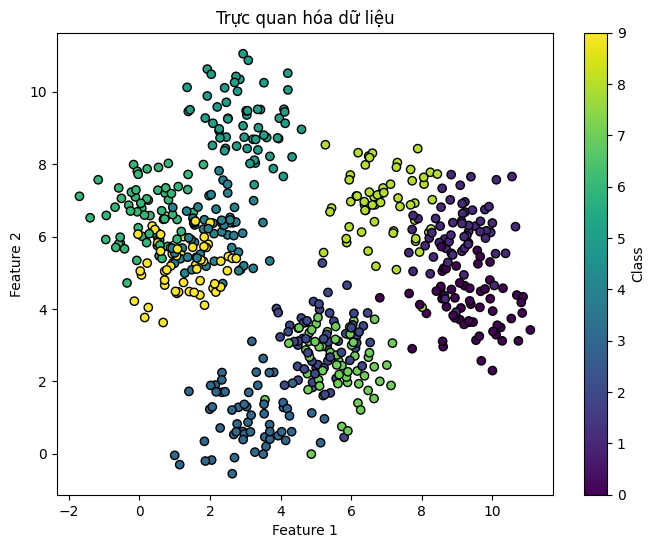

In [189]:
# Trực quan hóa dữ liệu
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor="k")
plt.title("Trực quan hóa dữ liệu")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")
plt.show()

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 2), (120, 2), (480,), (120,))

In [191]:
def euclid_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


def predict(x, X_train, y_train, k=3):
    distances = [euclid_distance(x, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]


def caclulate_accuracy(X_test, y_test, X_train, y_train, k=3):
    predictions = [predict(x, X_train, y_train, k) for x in X_test]
    accuracy = np.sum(predictions == y_test) / len(y_test)
    return accuracy

[np.float64(0.725), np.float64(0.725), np.float64(0.7416666666666667), np.float64(0.7583333333333333), np.float64(0.7916666666666666), np.float64(0.7666666666666667), np.float64(0.7833333333333333), np.float64(0.7666666666666667), np.float64(0.7833333333333333)]


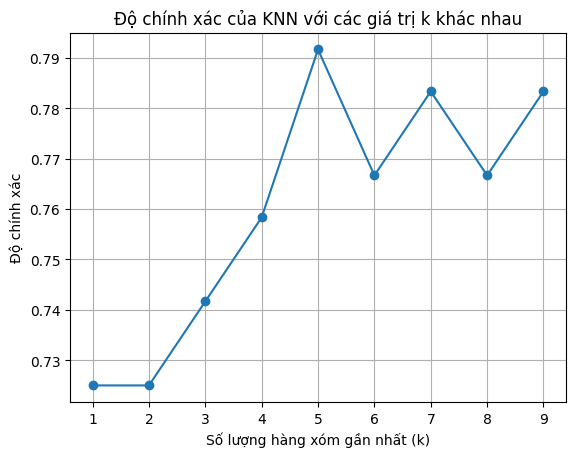

In [ ]:
accuracy = []
for k in range(1, 10):
    acc = caclulate_accuracy(X_test, y_test, X_train, y_train, k)
    accuracy.append(acc)

print(accuracy)

plt.plot(range(1, 10), accuracy, marker="o")
plt.title("Độ chính xác của KNN với các giá trị k khác nhau")
plt.xlabel("Số lượng hàng xóm gần nhất (k)")
plt.ylabel("Độ chính xác")
plt.xticks(range(1, 10))
plt.grid()
plt.show()